In [2]:
import pyhf
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from random import  uniform
import pyhf.contrib.viz.brazil as brazil
import sys

In [163]:
# functions:

def invert_interval(test_mus, hypo_tests, test_size=0.05):
    cls_obs = np.array([test[0] for test in hypo_tests]).flatten()
    cls_exp = [
        np.array([test[1][i] for test in hypo_tests]).flatten() for i in range(5)
    ]
    crossing_test_stats = {"exp": [], "obs": None}
    for cls_exp_sigma in cls_exp:
        crossing_test_stats["exp"].append(
            np.interp(
                test_size, list(reversed(cls_exp_sigma)), list(reversed(test_mus))
            )
        )
    crossing_test_stats["obs"] = np.interp(
        test_size, list(reversed(cls_obs)), list(reversed(test_mus))
    )
    return crossing_test_stats


def my_json_model(obs,signal,backgr,b_err):
    
    mod={
        "channels": [
            { "name": "SR_combined",
              "samples": [
                { "name": "signal",
                  "data": signal,
                  "modifiers": [ { "name": "mu", "type": "normfactor", "data": None},
                  ]
                },
                { "name": "background",
                  "data": backgr,
                  "modifiers": [ {"name": "uncorr_bkguncrt", "type": "shapesys", "data":b_err }]
                }
              ]
            }
        ],
        "observations": [
            { "name": "SR_combined", "data":obs}
        ],
         "measurements": [
            {
                "config": {
                    "parameters": [
                        {"auxdata": [1.0],"bounds": [[0.5,1.5]],"inits": [1.0],"name": "lumi","sigmas": [0.01]},
                        {"bounds": [[0.0,100.0]],"inits": [1.0],"name": "mu"}
                    ],
                    "poi": "mu"
                },
                "name": "Measurement"
            }
        ],
        "version": "1.0.0"
    }
    return mod



# DATA SET 1:   

two-bin simple case


-----------------------------------------------
Observed Limit on μ: 1.0134594896993234
-----------------------------------------------
Expected Limit(-2 σ) on μ: 0.5613725544776345
Expected Limit(-1 σ) on μ: 0.7572477250140139
Expected Limit on μ: 1.064400081468668
Expected Limit(1 σ) on μ: 1.5024234397368008
Expected Limit(2 σ) on μ: 2.0


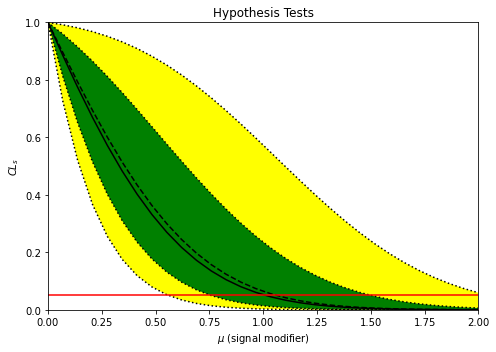

In [165]:

#============================== INPUT ==============================
alpha=0.05  # C.L.
mu_min,mu_max,dmu=0,2,30 
calctype='asymptotics'    
ntoys=None

obs = [51, 48]
signal = [12,11]
backgr = [50,52]
b_err = [3,7]
#===================================================================


model_json = my_json_model(obs,signal,backgr,b_err)
ws = pyhf.Workspace(model_json)
model = ws.model()
data = ws.data(model)

hypo_tests=[]
mu_tests=np.linspace(mu_min, mu_max, dmu)
for mu in mu_tests:
    try:
        CLs = pyhf.infer.hypotest(
                        mu,
                        data,
                        model,
                        calctype=calctype,
                        ntoys=ntoys,
                        qtilde=True,
                        return_expected_set=True
                        )
    except AssertionError:
        continue
    hypo_tests.append(CLs)
    
results = invert_interval(mu_tests, hypo_tests)
print('-----------------------------------------------')
print('Observed Limit on μ: {}'.format(results['obs']))
print('-----------------------------------------------')
for i, n_sigma in enumerate(np.arange(-2,3)):
    print('Expected Limit{} on μ: {}'.format('' if n_sigma==0 else '({} σ)'.format(n_sigma),results['exp'][i]))

    
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
ax1.set_title(u"Hypothesis Tests")
ax1.set_ylabel(r"$CL_s$")
ax1.set_xlabel(r"$\mu$ (signal modifier)")
pyhf.contrib.viz.brazil.plot_results(ax1, [mu*scale_factor for mu in mu_tests], hypo_tests);
plt.xlim([mu_min,mu_max])
plt.tight_layout()
plt.savefig('./CLs_plot.pdf')

# DATA SET 2:   

A small signal case Ns << Nb, Nb~Nobs

-----------------------------------------------
Observed Limit on μ: 48.74441640956437
-----------------------------------------------
Expected Limit(-2 σ) on μ: 27.101714829998812
Expected Limit(-1 σ) on μ: 37.02195852105831
Expected Limit on μ: 52.82651864813624
Expected Limit(1 σ) on μ: 76.3991318400855
Expected Limit(2 σ) on μ: 80.0


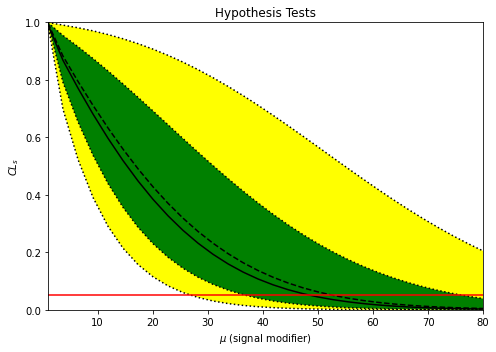

In [166]:
#============================== INPUT ==============================
alpha=0.05 # C.L.
mu_min,mu_max,dmu=1,80,30 
calctype='asymptotics' ; ntoys=None   

obs=[60,28,17,13,11,5,5,4,2,1,1]
backgr=[52.968,35.568,22.62,17.01,9.9184,6.579,4.202,2.604,1.45244,0.87975,1.050849]
b_err=[2.82531,1.88119,1.18574,1.80986,0.443551,0.291252,0.184132,0.307793,0.0722298,0.0433365,0.0232111]
signal=[0.0626789927483,0.0573835633695,0.0485781170428,0.0469522625208,0.0402057245374,0.035670042038,0.0286044124514,0.0214324165136,0.0165168642998,0.0122470948845,0.0177704431117]
#===================================================================



model_json = my_json_model(obs,signal,backgr,b_err)
ws = pyhf.Workspace(model_json)
model = ws.model()
data = ws.data(model)

hypo_tests=[]
mu_tests=np.linspace(mu_min, mu_max, dmu)
for mu in mu_tests:
    try:
        CLs = pyhf.infer.hypotest(
                        mu,
                        data,
                        model,
                        calctype=calctype,
                        ntoys=ntoys,
                        qtilde=True,
                        return_expected_set=True
                        )
    except AssertionError:
        continue
    hypo_tests.append(CLs)
    
results = invert_interval(mu_tests, hypo_tests)
print('-----------------------------------------------')
print('Observed Limit on μ: {}'.format(results['obs']))
print('-----------------------------------------------')
for i, n_sigma in enumerate(np.arange(-2,3)):
    print('Expected Limit{} on μ: {}'.format('' if n_sigma==0 else '({} σ)'.format(n_sigma),results['exp'][i]))

    
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
ax1.set_title(u"Hypothesis Tests")
ax1.set_ylabel(r"$CL_s$")
ax1.set_xlabel(r"$\mu$ (signal modifier)")
pyhf.contrib.viz.brazil.plot_results(ax1, [mu*scale_factor for mu in mu_tests], hypo_tests);
plt.xlim([mu_min,mu_max])
plt.tight_layout()
plt.savefig('./CLs_plot.pdf')

# Data Set 3:

From 'Simplified likelihood for the re-interpretation of public CMS results'\n

Ns~Nb (last bin), Nb+Ns ~ Nobs, i.e large background under-fluctiation in last bin

/opt/anaconda3/lib/python3.8/site-packages/pyhf/infer/calculators.py:229: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


-----------------------------------------------
Observed Limit on μ: 2.1825538634622808
-----------------------------------------------
Expected Limit(-2 σ) on μ: 0.6540420308572585
Expected Limit(-1 σ) on μ: 0.8700732259407138
Expected Limit on μ: 1.1943280118357613
Expected Limit(1 σ) on μ: 1.6454873746699243
Expected Limit(2 σ) on μ: 2.182218322948814


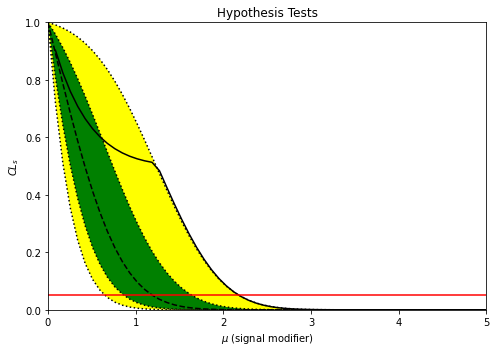

In [167]:
#============================== INPUT ==============================
alpha=0.05 # C.L.
mu_min,mu_max,dmu=0,5,60 
calctype='asymptotics' ; ntoys=None   
# calctype='toybased' ; ntoys=100000

obs  = [1964,877,354,182,82,36,15,11]
signal = [47.0,29.4,21.1,14.3,9.4,7.1,4.7,4.3]
backgr = [2006.4,836.4,350.0,147.1,62.0,26.2,11.1,4.7]
b_err = [129.6,24.6,38.1,29.5,18.8,11.0,6.2,3.3]
#===================================================================

model_json = my_json_model(obs,signal,backgr,b_err)
ws = pyhf.Workspace(model_json)
model = ws.model()
data = ws.data(model)

hypo_tests=[]
mu_tests=np.linspace(mu_min, mu_max, dmu)
for mu in mu_tests:
    try:
        CLs = pyhf.infer.hypotest(
                        mu,
                        data,
                        model,
                        calctype=calctype,
                        ntoys=ntoys,
                        qtilde=True,
                        return_expected_set=True
                        )
    except AssertionError:
        continue
    hypo_tests.append(CLs)
    
results = invert_interval(mu_tests, hypo_tests)
print('-----------------------------------------------')
print('Observed Limit on μ: {}'.format(results['obs']))
print('-----------------------------------------------')
for i, n_sigma in enumerate(np.arange(-2,3)):
    print('Expected Limit{} on μ: {}'.format('' if n_sigma==0 else '({} σ)'.format(n_sigma),results['exp'][i]))

    
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
ax1.set_title(u"Hypothesis Tests")
ax1.set_ylabel(r"$CL_s$")
ax1.set_xlabel(r"$\mu$ (signal modifier)")
pyhf.contrib.viz.brazil.plot_results(ax1, [mu*scale_factor for mu in mu_tests], hypo_tests);
plt.xlim([mu_min,mu_max])
plt.tight_layout()
plt.savefig('./CLs_plot.pdf')

# DATA SET 4:   



In [168]:
#===================================================================
alpha=0.05 # C.L.
calctype='asymptotics' ; ntoys=None   # 'toybased' or 'asymptotics'

obs = [1,42,126,163,143,102,68,38,23,24,9,11,6,3,1,2,2,0,1,1]
backgr = [1.364892700701803, 34.38077214472159, 126.951693247224,176.87152319211276, 153.7948310111972,103.90992140142669,70.47121143420206, 46.54210516657237, 25.88499419921163, 18.17915910296604, 9.578788305097104, 5.979332062243348, 3.713997321198467, 3.7147282416433773, 1.8407937930945089,0.6421384326867611, 1.5505729996495963, 0.5894230849997995,0.13119088855498937, 0.7003341847536428]
b_err = [0.22623409148675622, 4.650260129324572, 16.63436251775991,22.900739461702273, 19.162305148005174, 13.693457347606966,9.02437945993131, 5.480609224660377, 3.0657642695131955,2.3344037666133737, 1.1840350850341839, 0.7993865886755342,0.5176901146307928, 0.4193897335814709, 0.22222549630366206,0.21549093448922896, 0.18413397185522484, 0.09446208980795856,0.028856797863095474, 0.06149341800168189]
#===================================================================

### MLQ = 800 GeV

-----------------------------------------------
Observed Limit on μ: 0.2253634275613555
-----------------------------------------------
Expected Limit(-2 σ) on μ: 0.07067751003087107
Expected Limit(-1 σ) on μ: 0.10583900439088798
Expected Limit on μ: 0.1683931491911168
Expected Limit(1 σ) on μ: 0.2797834018943081
Expected Limit(2 σ) on μ: 0.45130725445881453


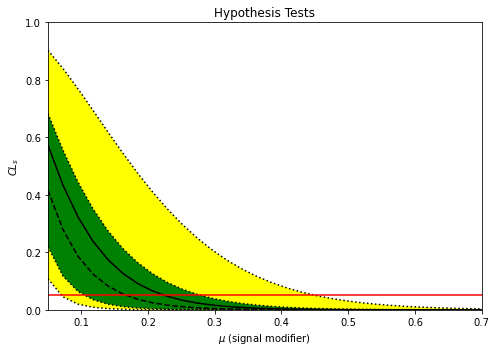

In [169]:
#===================================================================
mu_min,mu_max,dmu=0.05,0.7,30 
signal = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014931908438168762, 0.007465954219084381, 0.05972763375267505, 0.05972763375267505, 0.05226167953359067, 0.17171694703894078, 0.14185313016260323, 0.34343389407788155, 0.34343389407788155, 0.6346061086221724, 0.5226167953359067, 0.8511187809756194, 18.142268752375045]
#===================================================================

model_json = my_json_model(obs,signal,backgr,b_err)
ws = pyhf.Workspace(model_json)
model = ws.model()
data = ws.data(model)

hypo_tests=[]
mu_tests=np.linspace(mu_min, mu_max, dmu)
for mu in mu_tests:
    try:
        CLs = pyhf.infer.hypotest(
                        mu,
                        data,
                        model,
                        calctype=calctype,
                        ntoys=ntoys,
                        qtilde=True,
                        return_expected_set=True
                        )
    except AssertionError:
        continue
    hypo_tests.append(CLs)
    
results = invert_interval(mu_tests, hypo_tests)
print('-----------------------------------------------')
print('Observed Limit on μ: {}'.format(results['obs']))
print('-----------------------------------------------')
for i, n_sigma in enumerate(np.arange(-2,3)):
    print('Expected Limit{} on μ: {}'.format('' if n_sigma==0 else '({} σ)'.format(n_sigma),results['exp'][i]))

    
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
ax1.set_title(u"Hypothesis Tests")
ax1.set_ylabel(r"$CL_s$")
ax1.set_xlabel(r"$\mu$ (signal modifier)")
pyhf.contrib.viz.brazil.plot_results(ax1, [mu*scale_factor for mu in mu_tests], hypo_tests);
plt.xlim([mu_min,mu_max])
plt.tight_layout()
plt.savefig('./CLs_plot.pdf')

### MLQ = 1100 GeV

-----------------------------------------------
Observed Limit on μ: 2.159472915363199
-----------------------------------------------
Expected Limit(-2 σ) on μ: 1.0
Expected Limit(-1 σ) on μ: 1.1362353864707502
Expected Limit on μ: 1.8360284286150963
Expected Limit(1 σ) on μ: 3.0
Expected Limit(2 σ) on μ: 3.0


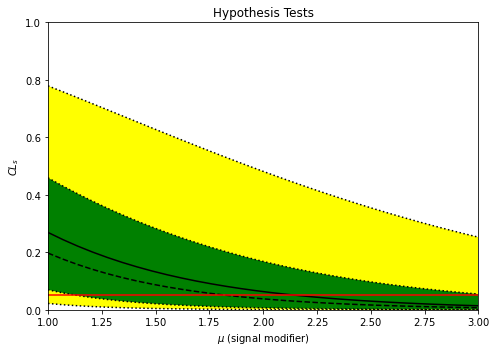

In [170]:
#===================================================================
mu_min,mu_max,dmu=1,3,30 
signal = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0014650760230409217, 0.0014650760230409217, 0.0014650760230409217, 0.005860304092163687, 0.0029301520460818433, 0.0014650760230409217, 0.00879045613824553, 0.011720608184327373, 0.014650760230409217, 1.6921628066122645]
#===================================================================

model_json = my_json_model(obs,signal,backgr,b_err)
ws = pyhf.Workspace(model_json)
model = ws.model()
data = ws.data(model)

hypo_tests=[]
mu_tests=np.linspace(mu_min, mu_max, dmu)
for mu in mu_tests:
    try:
        CLs = pyhf.infer.hypotest(
                        mu,
                        data,
                        model,
                        calctype=calctype,
                        ntoys=ntoys,
                        qtilde=True,
                        return_expected_set=True
                        )
    except AssertionError:
        continue
    hypo_tests.append(CLs)
    
results = invert_interval(mu_tests, hypo_tests)
print('-----------------------------------------------')
print('Observed Limit on μ: {}'.format(results['obs']))
print('-----------------------------------------------')
for i, n_sigma in enumerate(np.arange(-2,3)):
    print('Expected Limit{} on μ: {}'.format('' if n_sigma==0 else '({} σ)'.format(n_sigma),results['exp'][i]))

    
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
ax1.set_title(u"Hypothesis Tests")
ax1.set_ylabel(r"$CL_s$")
ax1.set_xlabel(r"$\mu$ (signal modifier)")
pyhf.contrib.viz.brazil.plot_results(ax1, [mu*scale_factor for mu in mu_tests], hypo_tests);
plt.xlim([mu_min,mu_max])
plt.tight_layout()
plt.savefig('./CLs_plot.pdf')

# Data Set 5:   MLQ=1500 GeV in the DM model

we use bins in the R_T spectrum.


In [193]:
#===================================================================
alpha=0.05 # C.L.
calctype='asymptotics' ; ntoys=None   # 'toybased' or 'asymptotics'


obs =  [102094.16775, 57720.47175, 32240.2635, 15600.1275, 2253.35175, 1040.0085, 346.6695]
signal_208 = [1605.6498, 963.38988, 2247.9097199999997, 2247.9097199999997, 642.25992, 0.0, 0.0] 
signal_307 = [834.83899, 1080.379872, 834.838992, 441.973584, 245.54088, 147.324528, 98.21635] 
signal_406 = [455.04419490000004, 776.9047230000001, 677.0169729, 566.0305839, 199.7755002, 210.8741391, 55.4931945]
signal_505 = [419.01832890000003, 539.2018806, 457.99677810000003, 380.03987970000003, 220.87787880000002, 81.20510250000001, 29.2338369]
signal_604=[714.18047283, 730.60740594, 611.70769962, 500.6303424, 322.28078292, 169.74497547, 96.21489393]
signal_703=[348.62236053000004, 347.1584394000001, 326.03614881000004, 253.88575026000004, 179.85316740000002, 86.16221508000001, 61.69381905000001]
signal_794=[247.25974968250316, 258.3418222817772, 223.51245125548743, 183.0700824191758, 119.16826119738802, 61.742975910240894, 43.89652133478665]

backgr = [102094.16775, 57720.47175, 32240.2635, 15600.1275, 2253.35175, 1040.0085, 346.6695]
b_err = [b*0.1 for b in backgr]
#===================================================================

/opt/anaconda3/lib/python3.8/site-packages/pyhf/infer/calculators.py:229: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


-----------------------------------------------
Observed Limit on μ: 0.5811602013775617
-----------------------------------------------
Expected Limit(-2 σ) on μ: 0.31957002140490964
Expected Limit(-1 σ) on μ: 0.42487304771585455
Expected Limit on μ: 0.5811597785892789
Expected Limit(1 σ) on μ: 0.7930561481354198
Expected Limit(2 σ) on μ: 1.0
-------------------------------------------
CLs=0.00045693007330708266, <CLs>=0.00045692821504939886 at μ=1


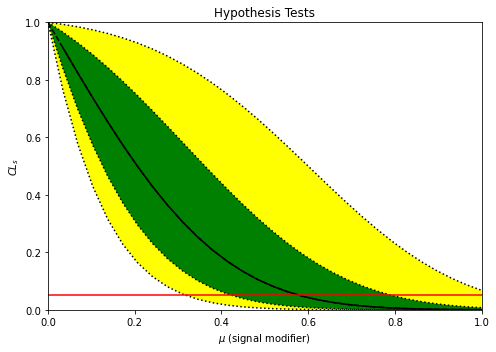

In [188]:
#===================================================================
mu_min,mu_max,dmu=0,1,30 
signal=signal_208 
#===================================================================

model_json = my_json_model(obs,signal,backgr,b_err)
ws = pyhf.Workspace(model_json)
model = ws.model()
data = ws.data(model)

hypo_tests=[]
mu_tests=np.linspace(mu_min, mu_max, dmu)
for mu in mu_tests:
    try:
        CLs = pyhf.infer.hypotest(
                        mu,
                        data,
                        model,
                        calctype=calctype,
                        ntoys=ntoys,
                        qtilde=True,
                        return_expected_set=True
                        )
    except AssertionError:
        continue
    hypo_tests.append(CLs)
    
results = invert_interval(mu_tests, hypo_tests)
print('-----------------------------------------------')
print('Observed Limit on μ: {}'.format(results['obs']))
print('-----------------------------------------------')
for i, n_sigma in enumerate(np.arange(-2,3)):
    print('Expected Limit{} on μ: {}'.format('' if n_sigma==0 else '({} σ)'.format(n_sigma),results['exp'][i]))

    
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
ax1.set_title(u"Hypothesis Tests")
ax1.set_ylabel(r"$CL_s$")
ax1.set_xlabel(r"$\mu$ (signal modifier)")
pyhf.contrib.viz.brazil.plot_results(ax1, [mu*scale_factor for mu in mu_tests], hypo_tests);
plt.xlim([mu_min,mu_max])
plt.tight_layout()
plt.savefig('./CLs_plot.pdf')


CLs, CLs_exp = pyhf.infer.hypotest(1.0,data,model,calctype=calctype,ntoys=ntoys,qtilde=True,return_expected=True)
print('-------------------------------------------')
print('CLs={}, <CLs>={} at μ=1'.format(CLs,CLs_exp))

/opt/anaconda3/lib/python3.8/site-packages/pyhf/infer/calculators.py:229: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


-----------------------------------------------
Observed Limit on μ: 0.6216248501978356
-----------------------------------------------
Expected Limit(-2 σ) on μ: 0.33882646396320293
Expected Limit(-1 σ) on μ: 0.45170341670983155
Expected Limit on μ: 0.6216250079751396
Expected Limit(1 σ) on μ: 0.8560094121904008
Expected Limit(2 σ) on μ: 1.0
-------------------------------------------
CLs=0.0013318707746344544, <CLs>=0.0013318725539826712 at μ=1


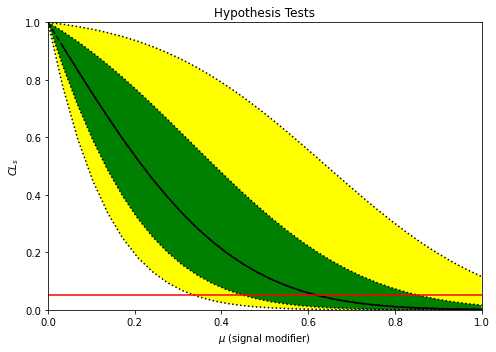

In [189]:
#===================================================================
mu_min,mu_max,dmu=0,1,30 
signal=signal_307
#===================================================================

model_json = my_json_model(obs,signal,backgr,b_err)
ws = pyhf.Workspace(model_json)
model = ws.model()
data = ws.data(model)

hypo_tests=[]
mu_tests=np.linspace(mu_min, mu_max, dmu)
for mu in mu_tests:
    try:
        CLs = pyhf.infer.hypotest(
                        mu,
                        data,
                        model,
                        calctype=calctype,
                        ntoys=ntoys,
                        qtilde=True,
                        return_expected_set=True
                        )
    except AssertionError:
        continue
    hypo_tests.append(CLs)
    
results = invert_interval(mu_tests, hypo_tests)
print('-----------------------------------------------')
print('Observed Limit on μ: {}'.format(results['obs']))
print('-----------------------------------------------')
for i, n_sigma in enumerate(np.arange(-2,3)):
    print('Expected Limit{} on μ: {}'.format('' if n_sigma==0 else '({} σ)'.format(n_sigma),results['exp'][i]))

    
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
ax1.set_title(u"Hypothesis Tests")
ax1.set_ylabel(r"$CL_s$")
ax1.set_xlabel(r"$\mu$ (signal modifier)")
pyhf.contrib.viz.brazil.plot_results(ax1, [mu*scale_factor for mu in mu_tests], hypo_tests);
plt.xlim([mu_min,mu_max])
plt.tight_layout()
plt.savefig('./CLs_plot.pdf')

CLs, CLs_exp = pyhf.infer.hypotest(1.0,data,model,calctype=calctype,ntoys=ntoys,qtilde=True,return_expected=True)
print('-------------------------------------------')
print('CLs={}, <CLs>={} at μ=1'.format(CLs,CLs_exp))

/opt/anaconda3/lib/python3.8/site-packages/pyhf/infer/calculators.py:229: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


-----------------------------------------------
Observed Limit on μ: 0.7340403104072648
-----------------------------------------------
Expected Limit(-2 σ) on μ: 0.4007653856082121
Expected Limit(-1 σ) on μ: 0.5342031933598034
Expected Limit on μ: 0.7340402311046004
Expected Limit(1 σ) on μ: 1.0
Expected Limit(2 σ) on μ: 1.0
-------------------------------------------
CLs=0.006806985553930016, <CLs>=0.006806982050313009 at μ=1


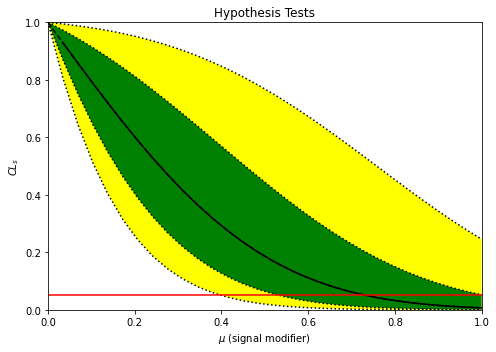

In [190]:
mu_min,mu_max,dmu=0,1,30 
signal=signal_406
#===================================================================

model_json = my_json_model(obs,signal,backgr,b_err)
ws = pyhf.Workspace(model_json)
model = ws.model()
data = ws.data(model)

hypo_tests=[]
mu_tests=np.linspace(mu_min, mu_max, dmu)
for mu in mu_tests:
    try:
        CLs = pyhf.infer.hypotest(
                        mu,
                        data,
                        model,
                        calctype=calctype,
                        ntoys=ntoys,
                        qtilde=True,
                        return_expected_set=True
                        )
    except AssertionError:
        continue
    hypo_tests.append(CLs)
    
results = invert_interval(mu_tests, hypo_tests)
print('-----------------------------------------------')
print('Observed Limit on μ: {}'.format(results['obs']))
print('-----------------------------------------------')
for i, n_sigma in enumerate(np.arange(-2,3)):
    print('Expected Limit{} on μ: {}'.format('' if n_sigma==0 else '({} σ)'.format(n_sigma),results['exp'][i]))

    
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
ax1.set_title(u"Hypothesis Tests")
ax1.set_ylabel(r"$CL_s$")
ax1.set_xlabel(r"$\mu$ (signal modifier)")
pyhf.contrib.viz.brazil.plot_results(ax1, [mu*scale_factor for mu in mu_tests], hypo_tests);
plt.xlim([mu_min,mu_max])
plt.tight_layout()
plt.savefig('./CLs_plot.pdf')

CLs, CLs_exp = pyhf.infer.hypotest(1.0,data,model,calctype=calctype,ntoys=ntoys,qtilde=True,return_expected=True)
print('-------------------------------------------')
print('CLs={}, <CLs>={} at μ=1'.format(CLs,CLs_exp))

/opt/anaconda3/lib/python3.8/site-packages/pyhf/infer/calculators.py:229: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


-----------------------------------------------
Observed Limit on μ: 1.3093576010488595
-----------------------------------------------
Expected Limit(-2 σ) on μ: 0.713369046364577
Expected Limit(-1 σ) on μ: 0.951788371990412
Expected Limit on μ: 1.309357687245624
Expected Limit(1 σ) on μ: 1.7980286946664128
Expected Limit(2 σ) on μ: 2.371425098913774
-------------------------------------------
CLs=0.13624435883276415, <CLs>=0.13624440172198174 at μ=1


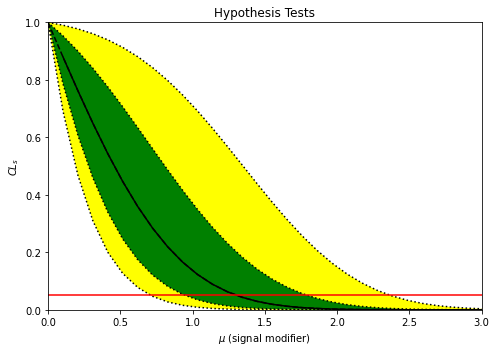

In [192]:
mu_min,mu_max,dmu=0,3,30 
signal=signal_505
#===================================================================

model_json = my_json_model(obs,signal,backgr,b_err)
ws = pyhf.Workspace(model_json)
model = ws.model()
data = ws.data(model)

hypo_tests=[]
mu_tests=np.linspace(mu_min, mu_max, dmu)
for mu in mu_tests:
    try:
        CLs = pyhf.infer.hypotest(
                        mu,
                        data,
                        model,
                        calctype=calctype,
                        ntoys=ntoys,
                        qtilde=True,
                        return_expected_set=True
                        )
    except AssertionError:
        continue
    hypo_tests.append(CLs)
    
results = invert_interval(mu_tests, hypo_tests)
print('-----------------------------------------------')
print('Observed Limit on μ: {}'.format(results['obs']))
print('-----------------------------------------------')
for i, n_sigma in enumerate(np.arange(-2,3)):
    print('Expected Limit{} on μ: {}'.format('' if n_sigma==0 else '({} σ)'.format(n_sigma),results['exp'][i]))

    
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
ax1.set_title(u"Hypothesis Tests")
ax1.set_ylabel(r"$CL_s$")
ax1.set_xlabel(r"$\mu$ (signal modifier)")
pyhf.contrib.viz.brazil.plot_results(ax1, [mu*scale_factor for mu in mu_tests], hypo_tests);
plt.xlim([mu_min,mu_max])
plt.tight_layout()
plt.savefig('./CLs_plot.pdf')

CLs, CLs_exp = pyhf.infer.hypotest(1.0,data,model,calctype=calctype,ntoys=ntoys,qtilde=True,return_expected=True)
print('-------------------------------------------')
print('CLs={}, <CLs>={} at μ=1'.format(CLs,CLs_exp))

/opt/anaconda3/lib/python3.8/site-packages/pyhf/infer/calculators.py:229: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


-----------------------------------------------
Observed Limit on μ: 0.5945081871578041
-----------------------------------------------
Expected Limit(-2 σ) on μ: 0.3242567070981691
Expected Limit(-1 σ) on μ: 0.43166257321577106
Expected Limit on μ: 0.5945081508793035
Expected Limit(1 σ) on μ: 0.8127802662957275
Expected Limit(2 σ) on μ: 1.0777038277829827
-------------------------------------------
CLs=0.0006632198602873795, <CLs>=0.0006632196203555337 at μ=1


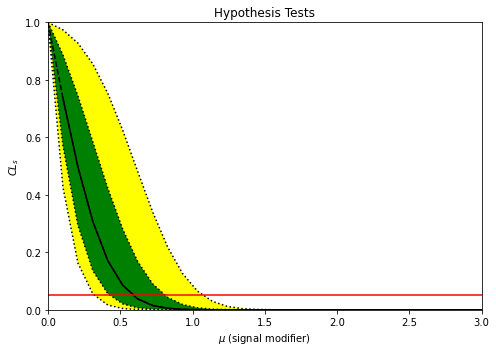

In [195]:
mu_min,mu_max,dmu=0,3,30 
signal=signal_604
#===================================================================

model_json = my_json_model(obs,signal,backgr,b_err)
ws = pyhf.Workspace(model_json)
model = ws.model()
data = ws.data(model)

hypo_tests=[]
mu_tests=np.linspace(mu_min, mu_max, dmu)
for mu in mu_tests:
    try:
        CLs = pyhf.infer.hypotest(
                        mu,
                        data,
                        model,
                        calctype=calctype,
                        ntoys=ntoys,
                        qtilde=True,
                        return_expected_set=True
                        )
    except AssertionError:
        continue
    hypo_tests.append(CLs)
    
results = invert_interval(mu_tests, hypo_tests)
print('-----------------------------------------------')
print('Observed Limit on μ: {}'.format(results['obs']))
print('-----------------------------------------------')
for i, n_sigma in enumerate(np.arange(-2,3)):
    print('Expected Limit{} on μ: {}'.format('' if n_sigma==0 else '({} σ)'.format(n_sigma),results['exp'][i]))

    
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
ax1.set_title(u"Hypothesis Tests")
ax1.set_ylabel(r"$CL_s$")
ax1.set_xlabel(r"$\mu$ (signal modifier)")
pyhf.contrib.viz.brazil.plot_results(ax1, [mu*scale_factor for mu in mu_tests], hypo_tests);
plt.xlim([mu_min,mu_max])
plt.tight_layout()
plt.savefig('./CLs_plot.pdf')

CLs, CLs_exp = pyhf.infer.hypotest(1.0,data,model,calctype=calctype,ntoys=ntoys,qtilde=True,return_expected=True)
print('-------------------------------------------')
print('CLs={}, <CLs>={} at μ=1'.format(CLs,CLs_exp))

/opt/anaconda3/lib/python3.8/site-packages/pyhf/infer/calculators.py:229: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


-----------------------------------------------
Observed Limit on μ: 0.9902931022526118
-----------------------------------------------
Expected Limit(-2 σ) on μ: 0.5407535849428451
Expected Limit(-1 σ) on μ: 0.717140937269731
Expected Limit on μ: 0.9902935929291607
Expected Limit(1 σ) on μ: 1.357771996875757
Expected Limit(2 σ) on μ: 1.7988792613742115
-------------------------------------------
CLs=0.046528871891826244, <CLs>=0.04652898329917493 at μ=1


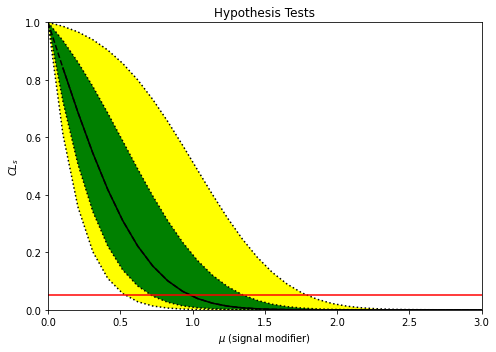

In [196]:
mu_min,mu_max,dmu=0,3,30 
signal=signal_703
#===================================================================

model_json = my_json_model(obs,signal,backgr,b_err)
ws = pyhf.Workspace(model_json)
model = ws.model()
data = ws.data(model)

hypo_tests=[]
mu_tests=np.linspace(mu_min, mu_max, dmu)
for mu in mu_tests:
    try:
        CLs = pyhf.infer.hypotest(
                        mu,
                        data,
                        model,
                        calctype=calctype,
                        ntoys=ntoys,
                        qtilde=True,
                        return_expected_set=True
                        )
    except AssertionError:
        continue
    hypo_tests.append(CLs)
    
results = invert_interval(mu_tests, hypo_tests)
print('-----------------------------------------------')
print('Observed Limit on μ: {}'.format(results['obs']))
print('-----------------------------------------------')
for i, n_sigma in enumerate(np.arange(-2,3)):
    print('Expected Limit{} on μ: {}'.format('' if n_sigma==0 else '({} σ)'.format(n_sigma),results['exp'][i]))

    
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
ax1.set_title(u"Hypothesis Tests")
ax1.set_ylabel(r"$CL_s$")
ax1.set_xlabel(r"$\mu$ (signal modifier)")
pyhf.contrib.viz.brazil.plot_results(ax1, [mu*scale_factor for mu in mu_tests], hypo_tests);
plt.xlim([mu_min,mu_max])
plt.tight_layout()
plt.savefig('./CLs_plot.pdf')

CLs, CLs_exp = pyhf.infer.hypotest(1.0,data,model,calctype=calctype,ntoys=ntoys,qtilde=True,return_expected=True)
print('-------------------------------------------')
print('CLs={}, <CLs>={} at μ=1'.format(CLs,CLs_exp))

/opt/anaconda3/lib/python3.8/site-packages/pyhf/infer/calculators.py:229: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


-----------------------------------------------
Observed Limit on μ: 1.401453920401395
-----------------------------------------------
Expected Limit(-2 σ) on μ: 0.7653911113529808
Expected Limit(-1 σ) on μ: 1.0176567165759975
Expected Limit on μ: 1.40145390929159
Expected Limit(1 σ) on μ: 1.9269298209287904
Expected Limit(2 σ) on μ: 2.54923831103704
-------------------------------------------
CLs=0.16433271473847175, <CLs>=0.16433271025210006 at μ=1


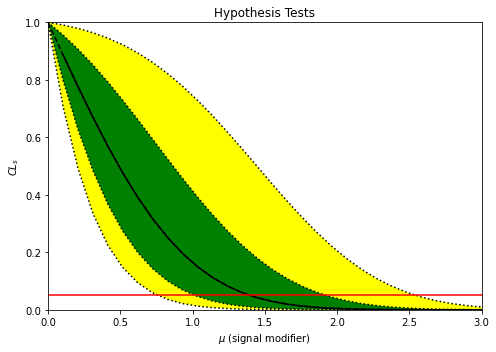

In [198]:
mu_min,mu_max,dmu=0,3,30 
signal=signal_794
#===================================================================

model_json = my_json_model(obs,signal,backgr,b_err)
ws = pyhf.Workspace(model_json)
model = ws.model()
data = ws.data(model)

hypo_tests=[]
mu_tests=np.linspace(mu_min, mu_max, dmu)
for mu in mu_tests:
    try:
        CLs = pyhf.infer.hypotest(
                        mu,
                        data,
                        model,
                        calctype=calctype,
                        ntoys=ntoys,
                        qtilde=True,
                        return_expected_set=True
                        )
    except AssertionError:
        continue
    hypo_tests.append(CLs)
    
results = invert_interval(mu_tests, hypo_tests)
print('-----------------------------------------------')
print('Observed Limit on μ: {}'.format(results['obs']))
print('-----------------------------------------------')
for i, n_sigma in enumerate(np.arange(-2,3)):
    print('Expected Limit{} on μ: {}'.format('' if n_sigma==0 else '({} σ)'.format(n_sigma),results['exp'][i]))

    
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
ax1.set_title(u"Hypothesis Tests")
ax1.set_ylabel(r"$CL_s$")
ax1.set_xlabel(r"$\mu$ (signal modifier)")
pyhf.contrib.viz.brazil.plot_results(ax1, [mu*scale_factor for mu in mu_tests], hypo_tests);
plt.xlim([mu_min,mu_max])
plt.tight_layout()
plt.savefig('./CLs_plot.pdf')

CLs, CLs_exp = pyhf.infer.hypotest(1.0,data,model,calctype=calctype,ntoys=ntoys,qtilde=True,return_expected=True)
print('-------------------------------------------')
print('CLs={}, <CLs>={} at μ=1'.format(CLs,CLs_exp))